<a href="https://colab.research.google.com/github/jumbokh/python_learn/blob/master/notebooks/Iris_ML_Comparison_Fixed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris 多模型比較與學習曲線示範

In [1]:

# -*- coding: utf-8 -*-
import locale
import os
os.environ["PYTHONIOENCODING"] = "utf-8"
try:
    locale.setlocale(locale.LC_ALL, '')
except locale.Error:
    pass


In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report


In [3]:

np.random.seed(42)
iris = load_iris()
X = iris.data
y = iris.target


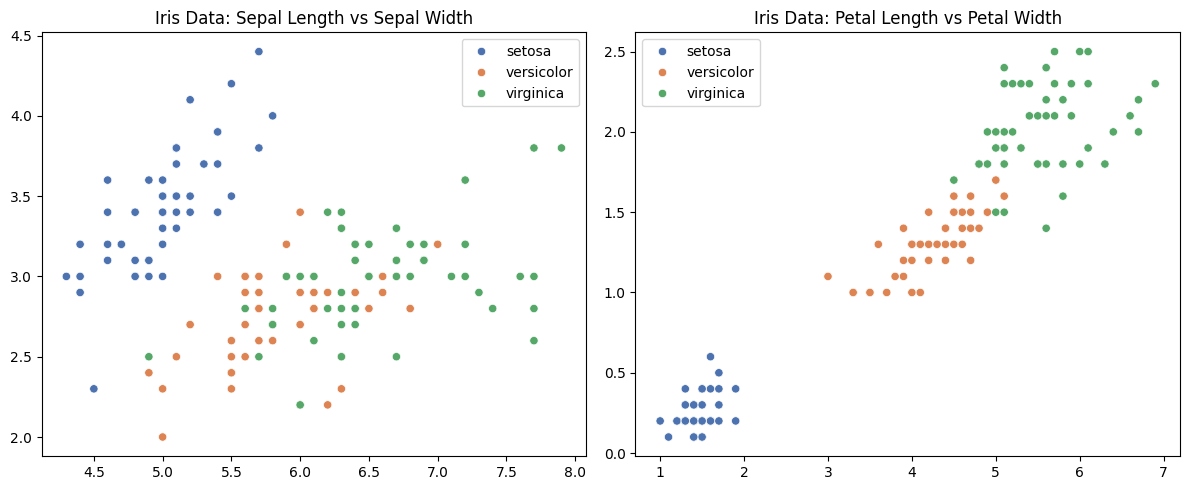

In [4]:

plt.figure(figsize=(12, 5))
plt.subplot(121)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=[iris.target_names[i] for i in y], palette='deep')
plt.title('Iris Data: Sepal Length vs Sepal Width')
plt.subplot(122)
sns.scatterplot(x=X[:, 2], y=X[:, 3], hue=[iris.target_names[i] for i in y], palette='deep')
plt.title('Iris Data: Petal Length vs Petal Width')
plt.tight_layout()
plt.show()


In [5]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    'Random Forest': (RandomForestClassifier(), {
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [None, 10, 20]
    }),
    'Naive Bayes': (GaussianNB(), {}),
    'SVM': (SVC(), {
        'model__C': [0.1, 1, 10],
        'model__kernel': ['rbf', 'linear']
    })
}

results = {}
for name, (model, params) in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    grid_search = GridSearchCV(pipeline, param_grid=params, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    results[name] = grid_search



Random Forest Results:
Best parameters: {'model__max_depth': None, 'model__n_estimators': 50}
Best cross-validation score: 0.9429
Test set score: 1.0000

Confusion Matrix:


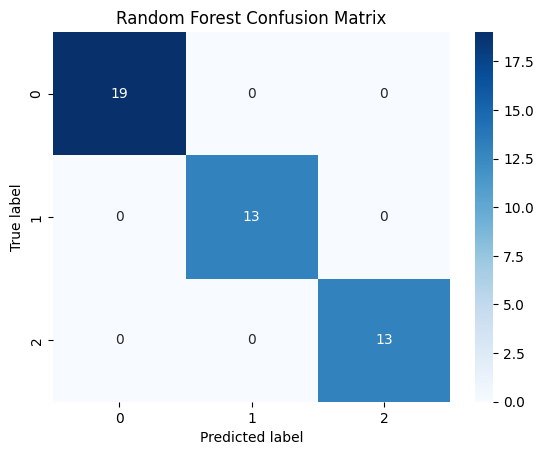


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



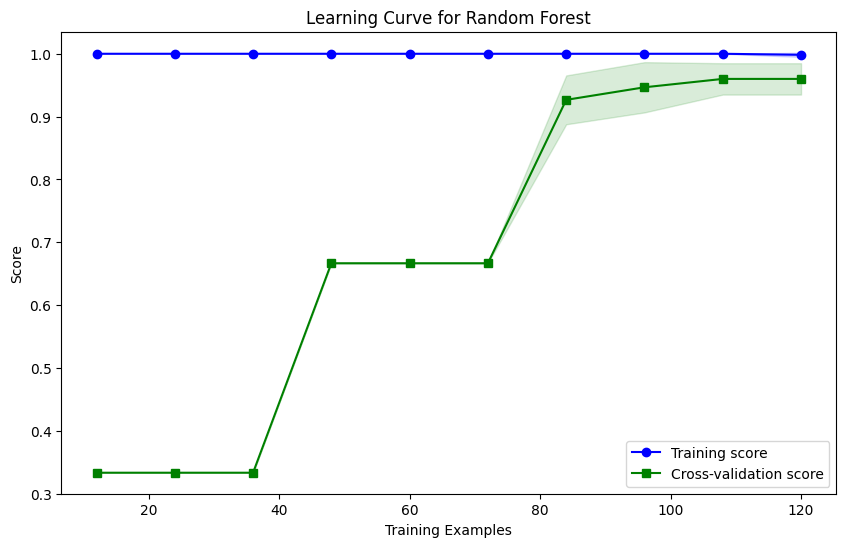


Naive Bayes Results:
Best parameters: {}
Best cross-validation score: 0.9333
Test set score: 0.9778

Confusion Matrix:


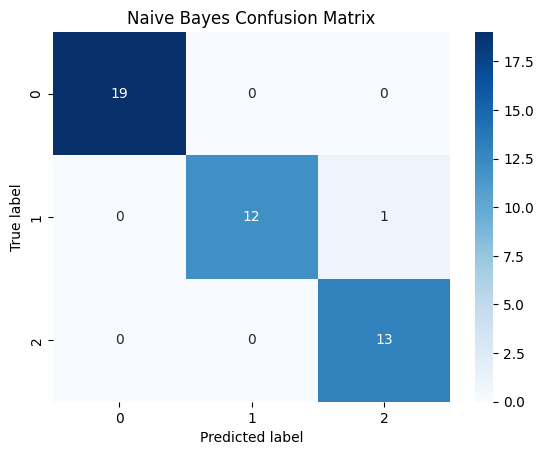


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



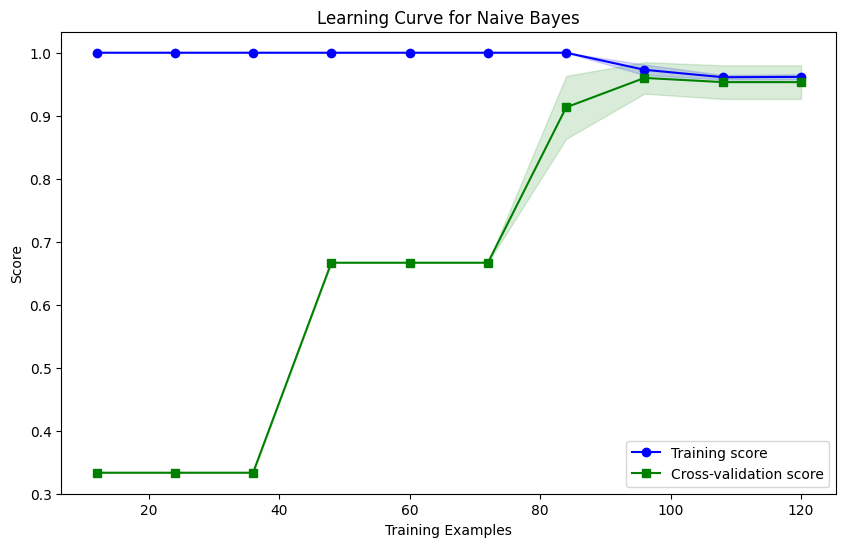


SVM Results:
Best parameters: {'model__C': 10, 'model__kernel': 'linear'}
Best cross-validation score: 0.9524
Test set score: 0.9778

Confusion Matrix:


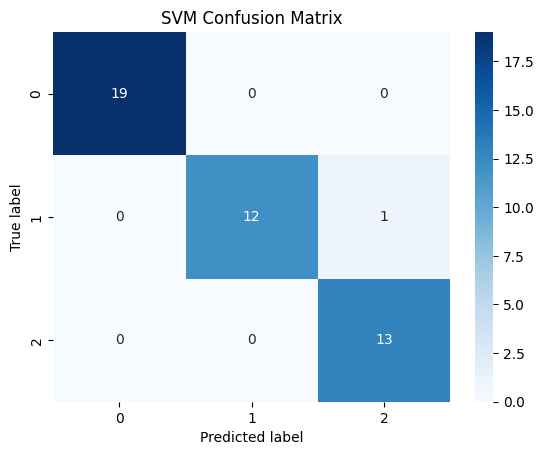


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **la

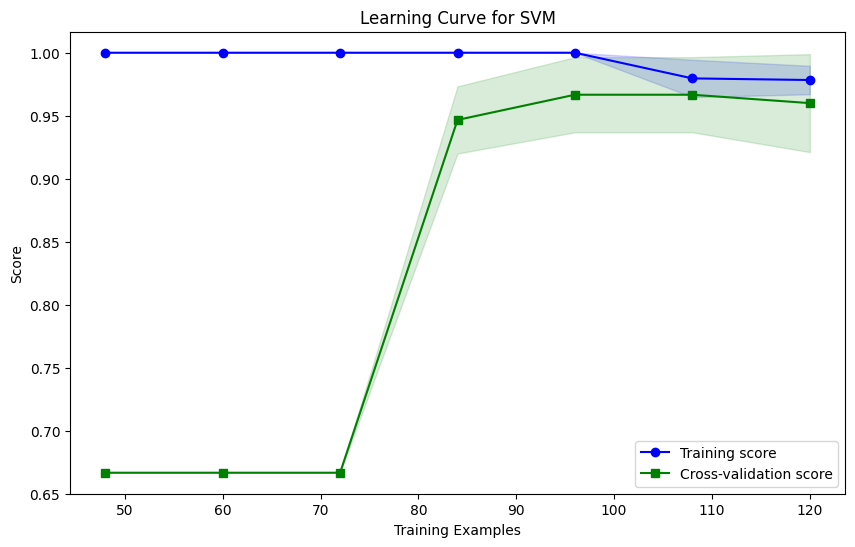

In [6]:

for name, grid_search in results.items():
    print(f"\n{name} Results:")
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_:.4f}")
    y_pred = grid_search.predict(X_test)
    print(f"Test set score: {grid_search.score(X_test, y_test):.4f}")
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=iris.target_names))

    train_sizes, train_scores, test_scores = learning_curve(
        grid_search.best_estimator_, X, y, cv=5, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10))
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Training score', color='blue', marker='o')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean, label='Cross-validation score', color='green', marker='s')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
    plt.title(f'Learning Curve for {name}')
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.legend(loc='lower right')
    plt.show()



Ensemble Learning Results:
Accuracy: 1.0000

Confusion Matrix:


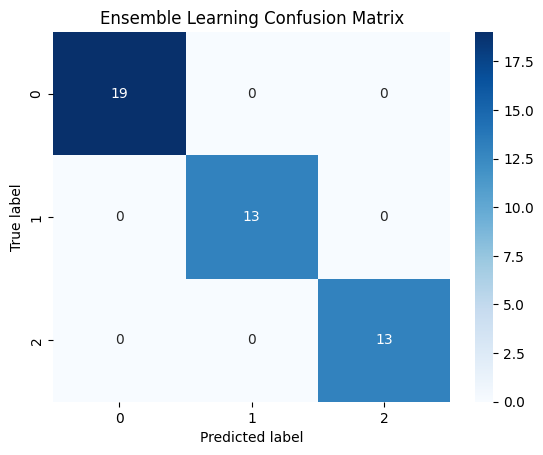


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [7]:

voting_clf = VotingClassifier(
    estimators=[('rf', results['Random Forest'].best_estimator_),
                ('nb', results['Naive Bayes'].best_estimator_),
                ('svm', results['SVM'].best_estimator_)],
    voting='hard'
)

voting_clf.fit(X_train, y_train)
y_pred_ensemble = voting_clf.predict(X_test)

print("\nEnsemble Learning Results:")
print(f"Accuracy: {voting_clf.score(X_test, y_test):.4f}")
print("\nConfusion Matrix:")
cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)
sns.heatmap(cm_ensemble, annot=True, fmt='d', cmap='Blues')
plt.title('Ensemble Learning Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print("\nClassification Report:")
print(classification_report(y_test, y_pred_ensemble, target_names=iris.target_names))


In [8]:

summary = pd.DataFrame({
    'Model': list(results.keys()) + ['Ensemble'],
    'Best CV Score': [f"{grid_search.best_score_:.4f}" for grid_search in results.values()] + ['-'],
    'Test Accuracy': [f"{grid_search.score(X_test, y_test):.4f}" for grid_search in results.values()] + [f"{voting_clf.score(X_test, y_test):.4f}"]
})
print("\nSummary Comparison Table:")
print(summary.to_string(index=False))



Summary Comparison Table:
        Model Best CV Score Test Accuracy
Random Forest        0.9429        1.0000
  Naive Bayes        0.9333        0.9778
          SVM        0.9524        0.9778
     Ensemble             -        1.0000
